In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Universities.csv')
data

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [4]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data.iloc[:,1:])

In [5]:
# How to find optimum number of cluster
# The K-Means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum of squares criterion

In [6]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_df)

KMeans(n_clusters=3, random_state=0)

In [7]:
kmeans.inertia_  #WCSS Score

44.531761731450956

#### We cannot interpret anything just by looking at the WCSS of single model we need to compare the WCSS score of different model using different K values ( Number of cluster)

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

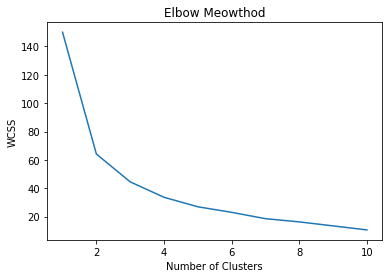

In [11]:
plt.plot(range(1,11), wcss)
plt.title("Elbow Meowthod")
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.show()

In [12]:
# Build Cluster Algorithm
clusters_new = KMeans(n_clusters=3, random_state=42)
clusters_new.fit(scaled_df)

KMeans(n_clusters=3, random_state=42)

In [13]:
clusters_new.labels_

array([2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0])

In [14]:
#Assign clusters to the data set
data['Clusterid_new'] = clusters_new.labels_

In [15]:
# these are standardized values of the centroids values
clusters_new.cluster_centers_

array([[ 0.90738779,  0.73921344, -0.76914845, -0.76617344,  0.97562148,
         0.61998454],
       [-1.93029211, -1.98148647,  1.59348244,  1.63857398, -1.23359906,
        -1.68680366],
       [-0.03711013,  0.10608541,  0.04570052,  0.02843875, -0.32051642,
         0.09727948]])

In [16]:
data.groupby('Clusterid_new').agg(['mean'])

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,mean,mean,mean,mean,mean,mean
Clusterid_new,,,,,,
0,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333


In [17]:
data[data['Clusterid_new']==0]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clusterid_new
1,CalTech,1415,100,25,6,63575,81,0
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0
10,MIT,1380,94,30,10,34870,91,0
14,Princeton,1375,91,14,8,30220,95,0
16,Stanford,1360,90,20,12,36450,93,0
24,Yale,1375,95,19,11,43514,96,0


In [18]:
data[data['Clusterid_new']==1]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clusterid_new
13,PennState,1081,38,54,18,10185,80,1
15,Purdue,1005,28,90,19,9066,69,1
17,TexasA&M,1075,49,67,25,8704,67,1
23,UWisconsin,1085,40,69,15,11857,71,1


In [19]:
data[data['Clusterid_new']==2]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clusterid_new
0,Brown,1310,89,22,13,22704,94,2
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
7,Georgetown,1255,74,24,12,20126,92,2
11,Northwestern,1260,85,39,11,28052,89,2
12,NotreDame,1255,81,42,13,15122,94,2
18,UCBerkeley,1240,95,40,17,15140,78,2
19,UChicago,1290,75,50,13,38380,87,2
20,UMichigan,1180,65,68,16,15470,85,2


### Iris Dataset

In [3]:
iris =  datasets.load_iris()
iris.data.shape

(150, 4)

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
x  = scale(iris.data)

In [6]:
clustering  =  KMeans(n_clusters=3, random_state=1 )

In [7]:
clustering.fit(x)

KMeans(n_clusters=3, random_state=1)

In [8]:
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [10]:
%matplotlib inline

In [13]:
iris_df = pd.DataFrame(iris.data, columns =iris.feature_names )

In [14]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


C:\Users\Moin Dalvi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


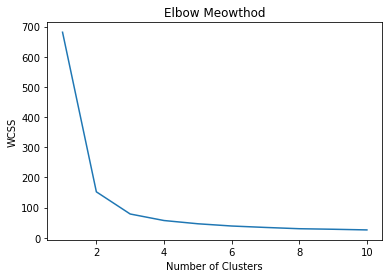

In [19]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(iris_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title("Elbow Meowthod")
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.show()

In [15]:
color = np.array(['red','green','blue'])

Text(0.5, 1.0, 'This is the Before Algorithm Known Dataset')

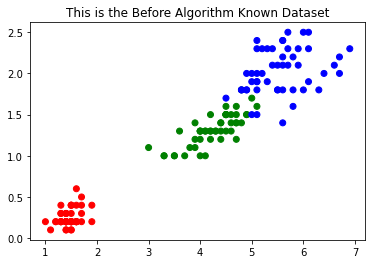

In [18]:
plt.scatter(x=iris_df['petal length (cm)'], y = iris_df['petal width (cm)'], c = color[iris.target])
plt.title("This is the Before Algorithm Known Dataset")

Text(0.5, 1.0, 'This is the After Algorithm wihout knowing Dataset')

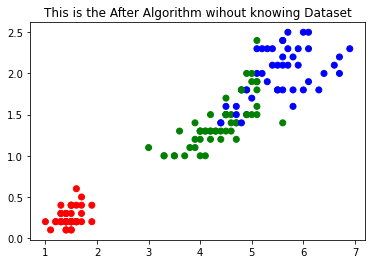

In [21]:
color = np.array(['green','red','blue'])
plt.scatter(x=iris_df['petal length (cm)'], y = iris_df['petal width (cm)'], c = color[clustering.labels_])
plt.title("This is the After Algorithm wihout knowing Dataset")